In [1]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('test.txt').read() 


twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(background_color="white", max_font_size=60,font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")
cloud = wc.generate_from_frequencies(dict([i for i in tags if i[1]>=3]))


# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('test.jpg')

/opt/homebrew/Caskroom/miniforge/base/envs/crawling/lib/python3.10/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


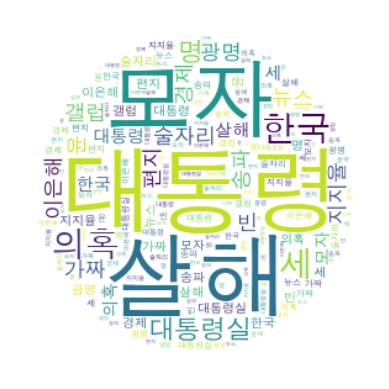

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask,font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")
wc.generate_from_frequencies(dict([i for i in tags if i[1]>=3]))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()